<a href="https://colab.research.google.com/github/AayushAnshu21/World_Happiness_Analysis/blob/master/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Analysis

In this project I have anaysed the relation of world happiness index of various countries with that country's Economic condition, Freedom index , Government corruption , Life expectancy and Geographical location.

The csv file used in this analysis was taken from [Kaggle](https://www.kaggle.com/mathurinache/world-happiness-report). This project is part of the assignment for the course [Data Analysis with Python: Zero to Pandas](http://zerotopandas.com).




In [ ]:
project_name = "World_Happiness_Analysis" 

## Data Preparation and Cleaning

We will import required libraries i.e  Pandas , Matplotlib and seaborn .We will also upload required csv file.

In [ ]:
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
happiness_df = pd.read_csv('World_happiness_Index_2020.csv')
happiness_df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Now we will remove some colums from this dataset which are not required.


In [ ]:
happiness_df.drop(['upperwhisker', 'lowerwhisker','Standard error of ladder score'], axis = 1,inplace = True) 
happiness_df.drop(happiness_df.loc[:, 'Ladder score in Dystopia': ].columns, axis = 1,inplace = True) 
happiness_df.head(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


 **Statistics of Given Datasets**

In [ ]:
happiness_df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [ ]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [ ]:
happiness_df.isnull().sum()   #This dataset does not contain null values

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Exploratory Analysis and Visualization



### **Q1: What is the region wise ladder score ?**

In [ ]:
happiness_region_df = happiness_df.groupby('Regional indicator')[['Ladder score']].mean().reset_index()
happiness_region_df.sort_values('Ladder score',ascending = False)

,Regional indicator,Ladder score
5,North America and ANZ,7.173525
9,Western Europe,6.899219
3,Latin America and Caribbean,5.981786
0,Central and Eastern Europe,5.883818
2,East Asia,5.714850
7,Southeast Asia,5.383367
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.227159
6,South Asia,4.475443
8,Sub-Saharan Africa,4.383495


### **Q2 :Plot the graph of relation beteen Geographical location and Ladder Score**

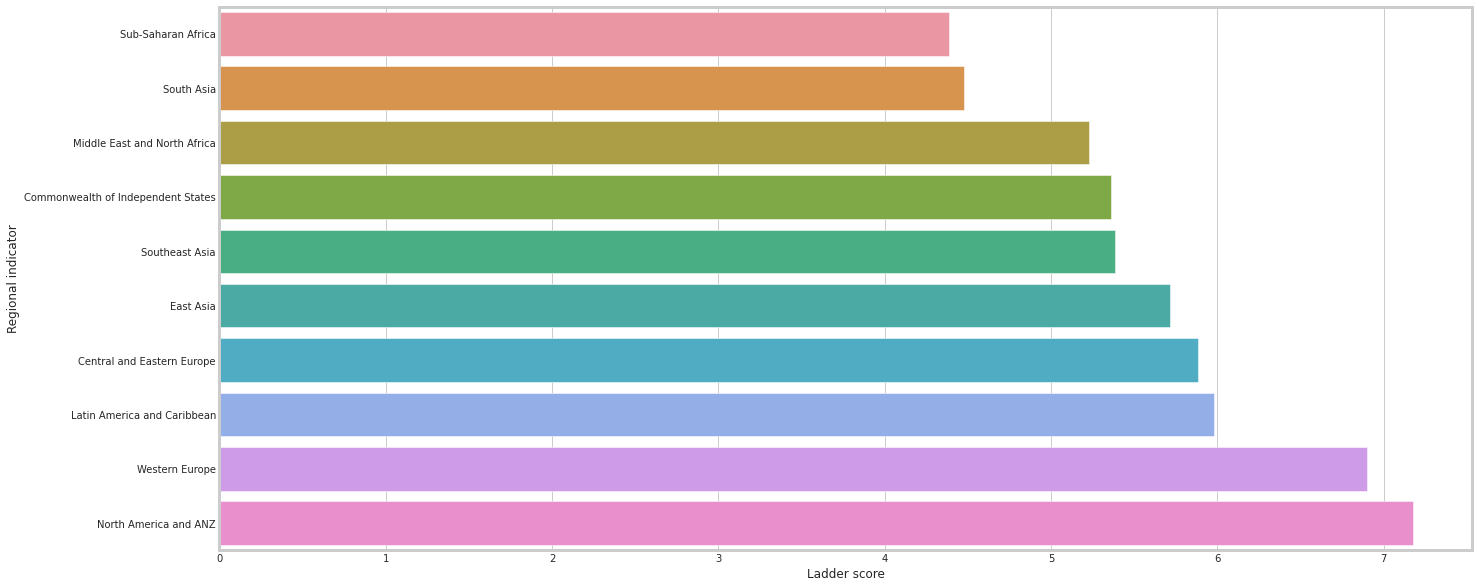

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot('Ladder score', 'Regional indicator', data=happiness_region_df,order=happiness_region_df.sort_values('Ladder score')['Regional indicator']);

### **Q3: Relation of Happiness Index of South Asian countries with its Freedom Index**

In [ ]:
sasian_countries_df = happiness_df[happiness_df['Regional indicator'] == 'South Asia']
sasian_countries_df.sort_values('Ladder score',ascending=False)[['Country name','Ladder score','Freedom to make life choices']].reset_index(drop = True)

,Country name,Ladder score,Freedom to make life choices
0,Pakistan,5.6933,0.734834
1,Maldives,5.1976,0.853963
2,Nepal,5.1372,0.797565
3,Bangladesh,4.8328,0.900625
4,Sri Lanka,4.3270,0.837634
5,India,3.5733,0.881445
6,Afghanistan,2.5669,0.396573


### **Q4: Plot of Relation of Happiness Index of South Asian countries with its Freedom Index**

Text(0, 0.5, 'Freedom to make life choices/Ladder score')

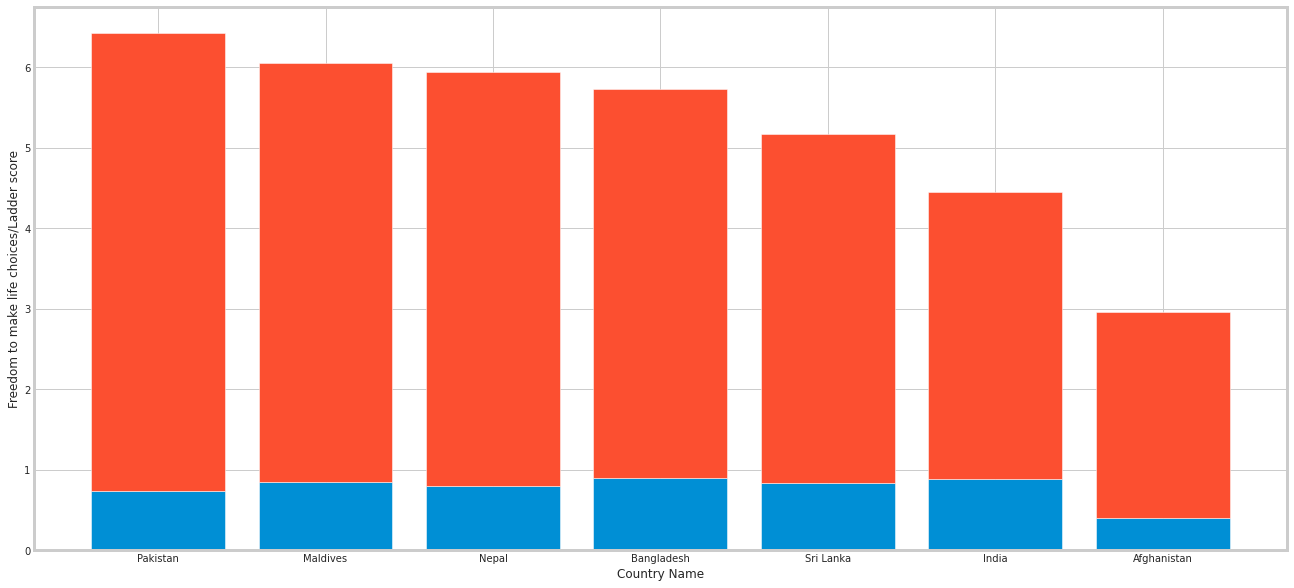

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(sasian_countries_df['Country name'], sasian_countries_df['Freedom to make life choices'] );
plt.bar(sasian_countries_df['Country name'], sasian_countries_df['Ladder score'],bottom=sasian_countries_df['Freedom to make life choices'])

plt.xlabel('Country Name')
plt.ylabel('Freedom to make life choices/Ladder score')


From the above plot we can conclude that the ladder score of South Asian countries is independent of its Freedom index.

### **Q5: What is the relation between Ladder score of Geographical location and its mean Healthy life expectancy**



In [ ]:
geo_healthdf = happiness_df.groupby('Regional indicator').mean().reset_index()
geo_healthdf = geo_healthdf[['Regional indicator','Ladder score','Healthy life expectancy']]
geo_healthdf = geo_healthdf.sort_values('Ladder score',ascending=False)
geo_healthdf['Healthy life expectancy'] = geo_healthdf['Healthy life expectancy']/10
geo_healthdf

,Regional indicator,Ladder score,Healthy life expectancy
5,North America and ANZ,7.173525,7.217707
9,Western Europe,6.899219,7.286356
3,Latin America and Caribbean,5.981786,6.671733
0,Central and Eastern Europe,5.883818,6.814899
2,East Asia,5.714850,7.109485
7,Southeast Asia,5.383367,6.471048
1,Commonwealth of Independent States,5.358342,6.472656
4,Middle East and North Africa,5.227159,6.531361
6,South Asia,4.475443,6.244866
8,Sub-Saharan Africa,4.383495,5.509159


### **Q6: Plot the relation between Ladder score of Geographical location and its mean Healthy life expectancy**

Text(0, 0.5, 'Ladder score/Healthy life expectancy')

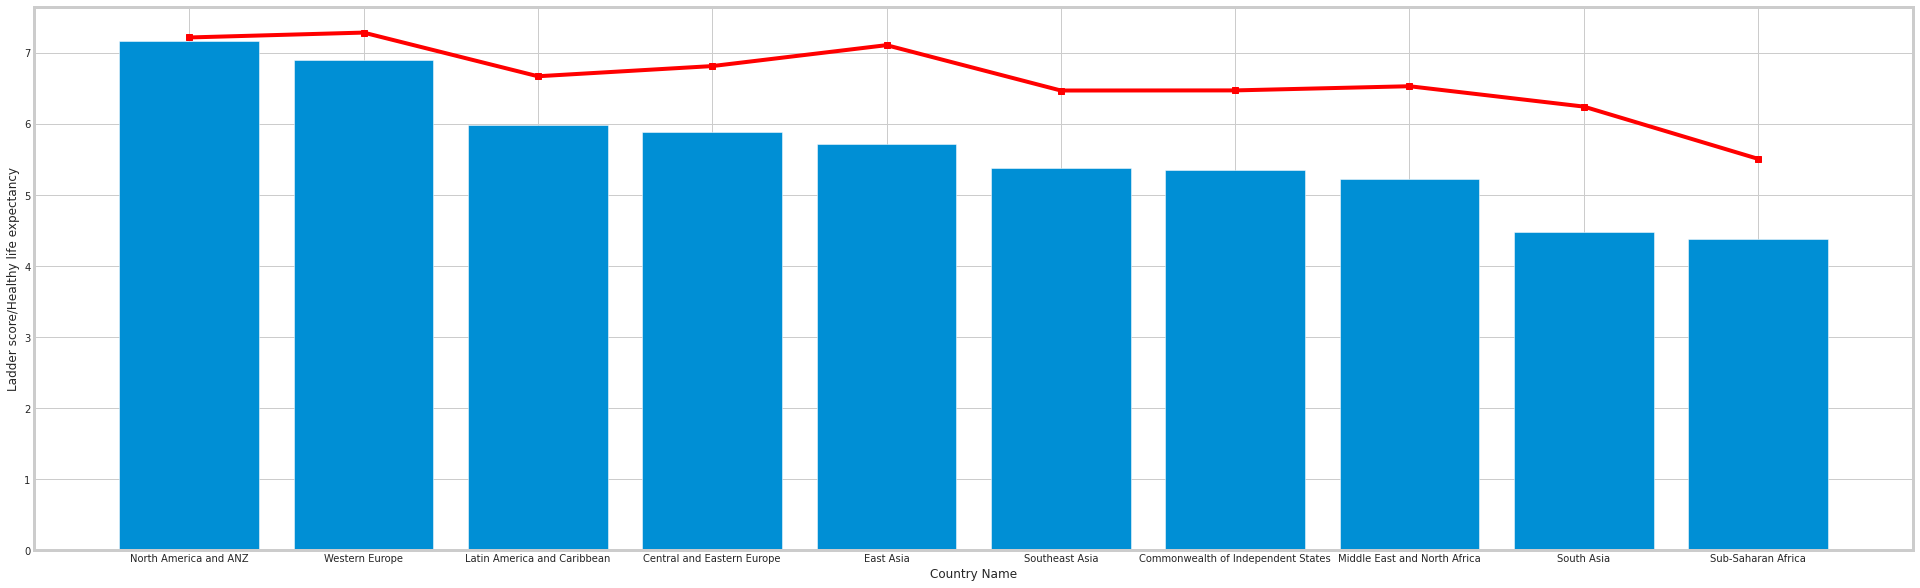

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(geo_healthdf['Regional indicator'], geo_healthdf['Ladder score'] );
plt.plot(geo_healthdf['Regional indicator'], geo_healthdf['Healthy life expectancy'],'s-r')

plt.xlabel('Country Name')
plt.ylabel('Ladder score/Healthy life expectancy')

We observe that there is a linear relation between mean Happiness index of Geographical location and its mean Healthy life expectancy. So we can conclude that Happiness of a region is largely depended on its healthcare system with some exception like East Asia.

### **Q7: Relation of South Asian countries with their Health Life Expectancy**

In [ ]:
sasian_countries_df = sasian_countries_df.sort_values('Ladder score',ascending=False)[['Country name','Ladder score','Healthy life expectancy']].reset_index(drop = True)
sasian_countries_df2 = sasian_countries_df.copy()
sasian_countries_df2['Healthy life expectancy'] = sasian_countries_df2['Healthy life expectancy']/10
sasian_countries_df2


,Country name,Ladder score,Healthy life expectancy
0,Pakistan,5.6933,5.825314
1,Maldives,5.1976,7.060000
2,Nepal,5.1372,6.377918
3,Bangladesh,4.8328,6.450307
4,Sri Lanka,4.3270,6.720007
5,India,3.5733,6.021519
6,Afghanistan,2.5669,5.259000


Text(0, 0.5, 'Ladder score/Healthy life expectancy')

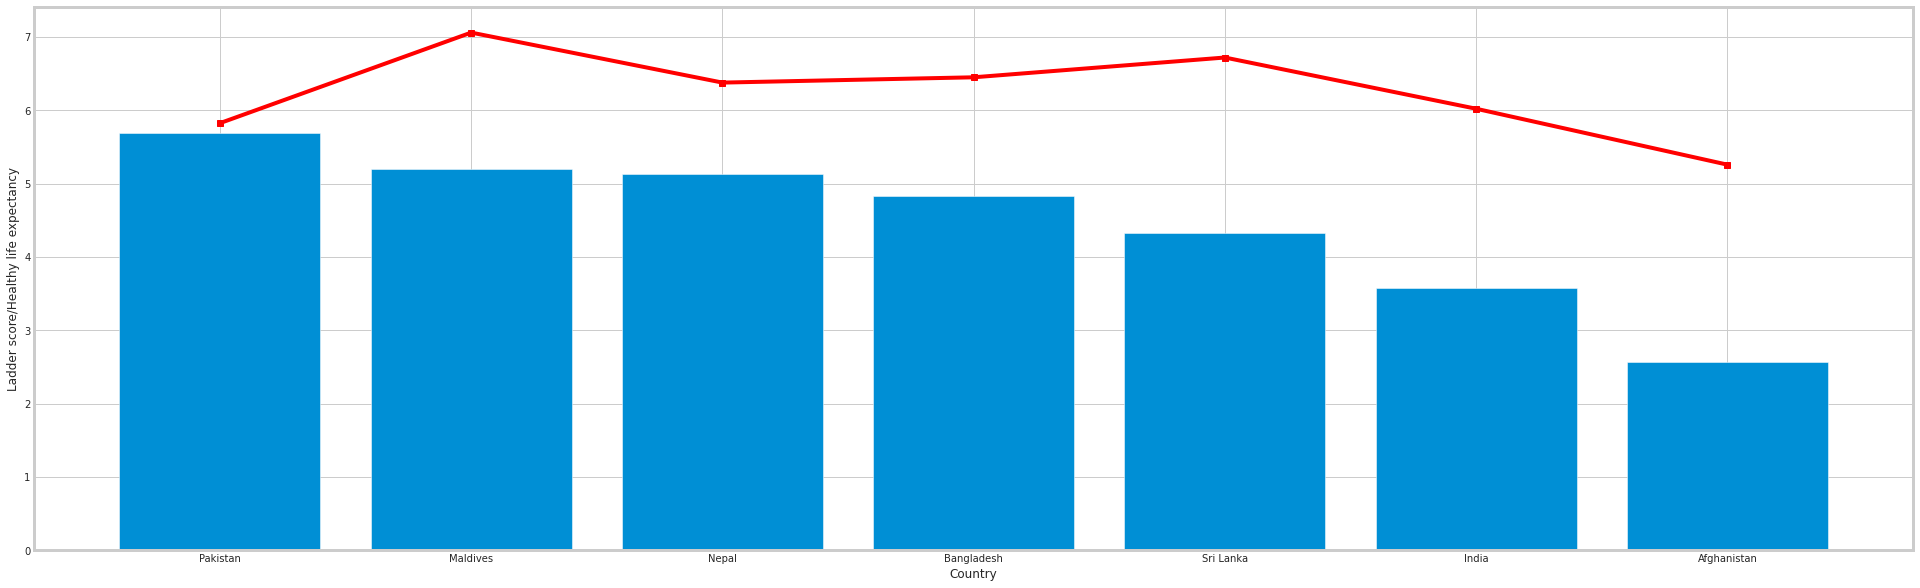

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(sasian_countries_df2['Country name'], sasian_countries_df2['Ladder score'] );
plt.plot(sasian_countries_df2['Country name'], sasian_countries_df2['Healthy life expectancy'],'s-r')

plt.xlabel('Country')
plt.ylabel('Ladder score/Healthy life expectancy')

Even though there was a clear relation between happiness index  and Healthy life expectancy in case of Geographical regions, the same trend is not visible in South Asian countires.

### **Q8: Plot the distribution of Happiness index of all the countries**

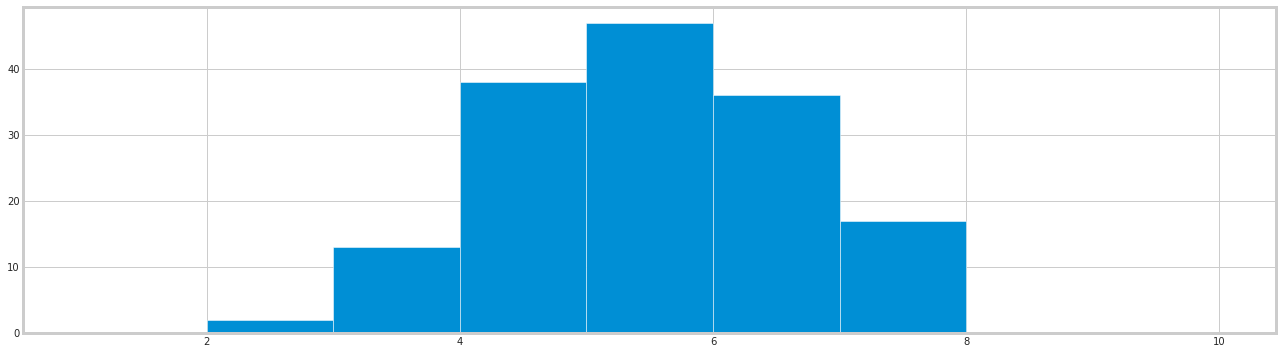

In [ ]:
plt.figure(figsize=(20, 6))
plt.hist(happiness_df['Ladder score'],bins=list(range(1,11)));

So we can conclude that happiness index of most of the countries lies in range of 5 and 6.

### **Q9: What is the relation between ladder score of Happiness index and Corruption index of Sub-Saharan Africa, South Asia and Western Europe**

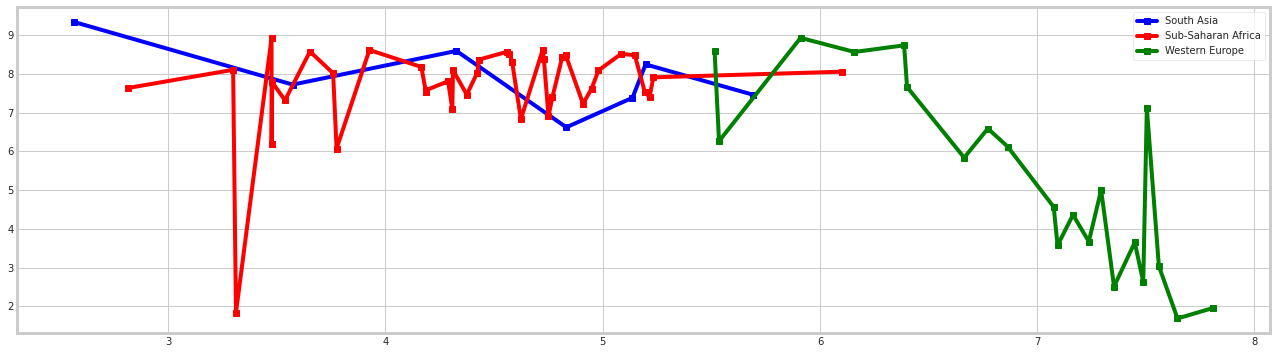

In [ ]:
Sub_Africa_df = happiness_df[happiness_df['Regional indicator'] == 'Sub-Saharan Africa'].copy()
sasian_countries_df3 = happiness_df[happiness_df['Regional indicator'] == 'South Asia'].copy()
west_europe_df = happiness_df[happiness_df['Regional indicator'] == 'Western Europe'].copy()

sasian_countries_df3['Perceptions of corruption'] = sasian_countries_df3['Perceptions of corruption'] * 10
Sub_Africa_df['Perceptions of corruption'] = Sub_Africa_df['Perceptions of corruption'] * 10
west_europe_df['Perceptions of corruption'] = west_europe_df['Perceptions of corruption'] * 10

plt.figure(figsize=(20, 6))
plt.plot(sasian_countries_df3['Ladder score'],sasian_countries_df3['Perceptions of corruption'],'s-b');
plt.plot(Sub_Africa_df['Ladder score'],Sub_Africa_df['Perceptions of corruption'],'s-r');
plt.plot(west_europe_df['Ladder score'],west_europe_df['Perceptions of corruption'],'s-g');
plt.legend(['South Asia', 'Sub-Saharan Africa','Western Europe']);


From the above chart we can conclude that there is no clear trend between Happiness index and Corruption index for Sub-Saharan African and South Asian countries.Whereas in case of Western Europen countries it is clearly visible that a inverse relation exist between Corruption index and Happiness Index.

# Inferences and Conclusion

From the above analsis of world happiness index, it can be concluded that  Happiness of country depends greatly on its geographical region.
For countries in Western Europe or North America , the happiness of the region if affected by political, economical and social factors. Whereas for South Asian and Sub-Sarahan African countries, Happiness of the region seems to be largely an independet factors irrespective of its political, economical and social factors.